# Linear Regression
.
.
.
<figure>
    <center> <img src="https://muthu.co/wp-content/uploads/2018/09/1_xc5CSmK9d8oeKYxKxenEGg.gif"  style="width:600px;height:400px;" ></center>
</figure>


# Outline
- [1 Project detail](#top_1)
- [&nbsp;&nbsp;1.1 Used Notations](#top_1.1)
- [&nbsp;&nbsp;1.2 Used Equations](#top_1.2)
- [2 Our Program](#top_2)
- [&nbsp;&nbsp;2.1 Import libraries](#top_2.1)
- [&nbsp;&nbsp;2.2 Load data](#top_2.2)
- [&nbsp;&nbsp;2.3 Define variables](#top_2.3)
- [&nbsp;&nbsp;2.4 Compute cost function](#top_2.4)
- [&nbsp;&nbsp;2.5 Plot cost function](#top_2.5)
- [&nbsp;&nbsp;2.6 Plot data with fit line](#top_2.6)

<a name="top_1"></a>
# 1. Project detail
---------------
This project hepls us to learn linear regression model.
Acutally we want to create a linear regression model on the available dataset, including 300 data, and test it with some items.


Let's get started

<a name="top_1.1"></a>
## 1.1 Notations used in this project
------------
Here is a summary of some of the notation you will encounter.  

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
|  $\mathbf{x}$ | Training Example feature values (in this lab - 97 items))  | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets (in this lab lab - 97 items).  | `y_train` 
| m | Number of training examples | `m`|
| n | Number of features          | `n`|
|  $w$  |  parameter: weight,                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` 

<a name="top_1.2"></a>
## 1.2  Equations Used in this project
 
 
 
 
-----------------
#### Model function: $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$


#### Parameters :                             `w` and `b`

#### Cost Function: $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

#### Graident Descent:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

<a name="top_2"></a>
## 2. Our Program
Here you can see the code to run this model

<a name="top_2.1"></a>
## 2.1 Import libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

<a name="top_2.2"></a>
## 2.2 Load data

In [2]:
filepath = 'Simple_Linear Regression_data.csv'
data = pd.read_csv(filepath)
#See five first items of dataframe
data.head()

,X,Y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 2.3 Define variables

In [3]:
# Set x and y train
x_train = np.array(data.iloc[:,0]).reshape(-1,1)
y_train = np.array(data.iloc[:,1]).reshape(-1,1)

# Set m and n
m = x_train.shape[0]
n = data.shape[1]-1

# ----------------------------------------
print(f'Number of training items: {m}')
print(f'Number of features: {n}')
print('\nFive rows of x: \n',x_train[:5])
print('\nFive rows of y: \n',y_train[:5])

Number of training items: 97
Number of features: 1

Five rows of x: 
 [[6.1101]
 [5.5277]
 [8.5186]
 [7.0032]
 [5.8598]]

Five rows of y: 
 [[17.592 ]
 [ 9.1302]
 [13.662 ]
 [11.854 ]
 [ 6.8233]]


<a name="top_2.3"></a>
## 2.3 Compute cost function

In [4]:
#Compute best cost function with Gradient Descent function
#---------------------------------

#Set initial values for w and b
w = 0
b = 0

# Create some lists to store data
cost_func_list = []
w_list = [0]
b_list = [0]

# Hyperparameters of model
Number_of_iterations = 200
learning_rate = 0.001

def compute_best_cost_func(x_train, y_train, m, lr, Number_of_iterations):
    
    global w,b
    
    # Create a loop to find the minimum cost function
    for i in range(Number_of_iterations):
        # Again, define equations
        f_wb = (w * x_train) + b
        error = (f_wb - y_train)
        cost_func = (1/(2 * m)) * sum(error**2)

        #Updata w and b with the help of gradient descent
        dj_dw = (1/m) * sum(error * x_train)
        dj_db = (1/m) * sum(error)
        w = w - lr * dj_dw
        b = b - lr * dj_db

        # Store varaibles to use 
        cost_func_list.append(cost_func)
        w_list.append(w)
        b_list.append(b)
        
    print(f'First cost function with w={w[0]},b={b[0]} is : {cost_func_list[0]}\nLast cost_function with (w,b)({w[-1]},{b[-1]})is :{cost_func_list[-1]}')
    return cost_func_list,w_list,b_list


# call the function
object = compute_best_cost_func(x_train,y_train,m,learning_rate,Number_of_iterations)

First cost function with w=0.8077936755478727,b=-0.06105369284849811 is : [32.07273388]
Last cost_function with (w,b)(0.8077936755478727,-0.06105369284849811)is :[5.81620083]


<a name="top_2.4"></a>
## 2.4 Plot cost funtion

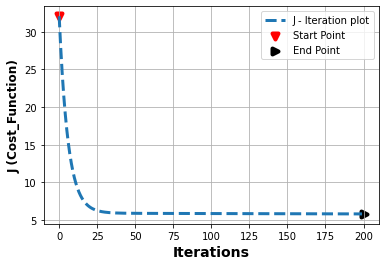

In [7]:
def plot_costfunction(x,y):
    figure = plt.figure(figsize=(6,4))
    plt.plot(x,y, linestyle='--',linewidth=3,label='J - Iteration plot')
    plt.scatter(x=0, y=cost_func_list[0], c='red', marker='v', linewidths=4, label='Start Point')
    plt.scatter(x=Number_of_iterations, y=cost_func_list[-1], c='black', marker='>',
                linewidths=4, label='End Point')
    plt.xlabel('Iterations',fontsize=14,fontweight='bold')
    plt.ylabel('J (Cost_Function)',fontsize=12,fontweight='bold')
    plt.grid()
    plt.legend()
    
    
    
    
object = plot_costfunction(x=np.arange(Number_of_iterations),y=cost_func_list)

<a name="top_2.5"></a>
## 2.5 Plot data with fit line

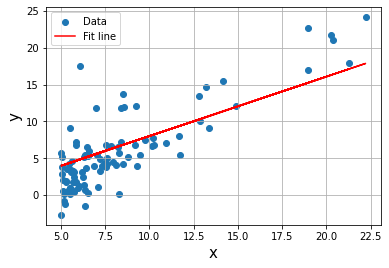

In [8]:
def fit_line(w,b):
    
    figure = plt.figure(figsize=(6,4))
    plt.scatter(x_train,y_train, label='Data')
    y_hat = (w * x_train) + b
    plt.plot(x_train , y_hat,color='red', label='Fit line' )
    plt.xlabel('x',fontsize=15)
    plt.ylabel('y',fontsize=15)
    plt.grid()
    plt.legend()
object = fit_line(w_list[-1], b_list[-1])